In [ ]:
#VGGを転移学習させて、くうの画像判定をしてみる

In [ ]:
#VGG16の取得
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights = 'imagenet')

In [ ]:
#VGG16の可視化
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#乱数を固定する
from tensorflow.keras import utils
utils.set_random_seed(0)

In [ ]:
#Googleドライブのマウントを行う（ファイルのドライブアイコンクリック）

In [ ]:
#ImageDataGeneratorクラスで特定のフォルダに格納されている画像データを前処理しながら予測モデルに流し込む

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#ImageDataGeneratorのインスタンスを作成する
#パラメータを指定することで、画像データの加工や複製方法の設定が可能
#今回はこれ
#rescale：画像データがもつピクセル値をスケーリング（今回は1/255)
#validation_split：学習データの一部をバリデーションデータとして使用する割合を指定（今回は25％）

# そのほかにもこんなパラメータ
#rotation_range（ランダム回転）
#width_shift_range/height_shift_range（水平垂直）
#zoom_range（ズーム）

In [ ]:
datagen = ImageDataGenerator(rescale=1/255,validation_split=0.25)

In [ ]:
#次にジェネレータを作成する
#ジェネレータ：一定数の画像データを繰り返し予測モデルへ流し込む機能を持ったオブジェクト

#flow_from_directoryメソッドでジェネレータを作成できる
#第１引数に、流し込みたい画像の格納先フォルダを指定
#パラメータも指定可能
#subset：trainingまたはvalidationを指定する（ImageDataGeneratorのインスタンス化の際に、validation_splitパラメータで、バリデーションデータを確保した場合のみ）
#target_size：画像のリサイズ（今回は256,256)
#batch_size：一度に流し込むデータ数（今回は64）


In [ ]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/data_train_add_toi',
    subset = 'training',
    target_size=(256,256),
    batch_size=64)

Found 384 images belonging to 2 classes.


In [ ]:
#belonging to 2 classes(２クラスに属する）は、犬と猫のカテゴリが認識されていることを意味する
#data_trainフォルダにdog,catフォルダを作成してそれぞれに格納したため。
#ImageDataGenratorが自動的にどの画像が犬で、どの画像が猫なのかを認識するようになった。
#犬猫のカテゴリは、数値ラベルで表現される
#class_indices属性で確認する

train_generator.class_indices

{'cat': 0, 'dog_toi': 1}

In [ ]:
#学習データのジェネレーターと同様に、バリデーションデータのジェネレータも作成する

In [ ]:
val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/data_train_add_toi',
    subset='validation',
    target_size=(256,256),
    batch_size=64)

Found 128 images belonging to 2 classes.


In [ ]:
#続いてテストデータのジェネレータも作成する
#テストデータはtrainingとvalidationの区別がないため、subsetパラメータは指定不要

In [ ]:
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/data_test',
    target_size = (256,256),
    batch_size = 64)

Found 128 images belonging to 2 classes.


In [ ]:
#以上で学習データのセットアップは完了

In [ ]:
#VGG16の全結合層以外の取得
#include_top=Falseオプションを指定して、VGG16を指定する
#VGG16へインプットできる画像サイズをジェネレータ作成の際に指定した画像サイズにそろえるためinput_shape=(256,256,3)も指定する



In [ ]:
vgg16_without_fc = VGG16(weights ='imagenet',include_top=False,input_shape=(256,256,3))

#引数weights='imagenet'
#ImageNetデータセットで事前学習されたパラメータ（重みと閾値）を持つ予測モデルを読み込めます。

In [ ]:
#以上でVGG16の全結合層以外の取得完了

In [ ]:
#summary()メソッドで予測モデル（全結合層を除くVGG16)を可視化する


In [ ]:
vgg16_without_fc.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#block5_pool(MaxPooling2D)より後にあった最後の全結合層(Flatten,Dense)が除外されている

In [ ]:
#VGG16のSequentialモデルへの変換
#VGG16はFunctionalAPIという形式のモデル構造で定義されているため、Sequentialモデルに変換する
#Sequentialモデルに変換する理由は、独自の層を簡潔に追加できるようにするため。
#まずはSequentialクラスをインスタンス化する
#次にVGG16の各層を１つずつ、addメソッドで追加していく
#これにより、VGG16モデルをSequentialモデルへ変換できる

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

for layer in vgg16_without_fc.layers:
  model.add(layer)

#for layer in vgg16_without_fc.layers:
#意味：事前学習済みモデル（ここではvgg16_without_fc）の各層を1つずつ取り出して処理するループ

# model.add(layer)
#意味：ループ内で取得した層（layer）を、新しいモデル（model）に追加します。
#役割：vgg16_without_fcからコピーした各層を順番にmodelに組み込んでいきます。

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#VGG16のパラメータ凍結
#次に、VGG由来の層のパラメータを変更しないようにするため、各層のtrainable属性をFalseに設定する
#学習をしてもVGG由来の層のパラメータはそのままの値で保持される
#後続プロセスで結合する独自の全結合層のパラメータのみが学習の対象となる
#各層のtrainable属性をFalseに設定しパラメータを凍結する

In [ ]:
for layer in model.layers:
#modelに含まれるすべての層のリストを取得する
#このループで、そのリストに含まれる各層（layer)を１つずつ処理する

  layer.trainable = False
#各層のtrainable属性をFalseい設定する

In [ ]:
#独自の全結合層の追加
#次に、全結合層を取り除いたVGG16に、犬と猫を分類するための独自の全結合層を追加する
#１．全結合層を取り除いたVGG16からの出力されるデータをFlattenクラスを使用して１次元に変換する
#２. 独自の全結合層を隠れ層として追加する。今回はノード数256、活性化関数ReLUとする
#ノード数には明確な推奨値なし。試行錯誤。
#３．独自の全結合層を出力層として追加する。犬猫の分類をするため、ノード数は２。活性化関数はソフトマックス

In [ ]:
from tensorflow.keras.layers import Flatten,Dense
model.add(Flatten())
model.add(Dense(256, activation ='relu'))
model.add(Dense(2, activation ='softmax'))

In [ ]:
#以上で、独自の全結合層の追加完了

In [ ]:
#予測モデル（VGG16+独自の全結合層）の可視化
#summary()メソッドを使ってVGG16と独自の全結合層を結合したモデルの構造を確認する

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 23,104,066 (88.14 MB)

 Trainable params: 8,389,378 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Total params: 23,104,066 (88.14 MB)
#  Trainable params: 8,389,378 (32.00 MB)
#  Non-trainable params: 14,714,688 (56.13 MB)...学習しないパラメータ（凍結実施が反映されている）

#  Trainable params: 8,389,378 ＝　 8,388,864　+　514
#　↑つまり新しく追加した全結合層のみが学習対象であるということが確認できる

In [ ]:
#誤差関数、最適化方法、評価指標の設定
#誤差関数：二値交差エントロピー誤差（Binary Cross-Entropy Error)
#compileメソッドの引数に、loss='binary_crossentropy'を指定すればOK

#最適化手法；Adam
#評価指標：accuracy(正解率)を指定する

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#以上で誤差関数、最適化方法、評価指標の設定完了

In [ ]:
#学習データとバリデーションデータを使って、予測モデルを学習させる
#引数
#train_generator...学習を共有するデータジェネレータ
#validation_data :val_generator
#epochs :5
#batch_size :64

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5587 - loss: 4.2842 - val_accuracy: 0.6250 - val_loss: 1.7601
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step - accuracy: 0.6961 - loss: 1.2308 - val_accuracy: 0.9141 - val_loss: 0.3896
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 594ms/step - accuracy: 0.9151 - loss: 0.3927 - val_accuracy: 0.9375 - val_loss: 0.2706
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.9419 - loss: 0.2071 - val_accuracy: 0.9141 - val_loss: 0.2551
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 580ms/step - accuracy: 0.9670 - loss: 0.1544 - val_accuracy: 0.9609 - val_loss: 0.1803


In [ ]:
#学習履歴の可視化
#次に学習過程での正解率と損失の変化を可視化し、過学習や学習不足を確認する
#fit関数の戻り値であるHistoryオブジェクトのhistory属性に、学習履歴の推移が格納されている
#DataFrameに変換して、seabornのlineplotメソッドを利用して、損失関数（loss,val_loss)の推移を可視化する

<Axes: >

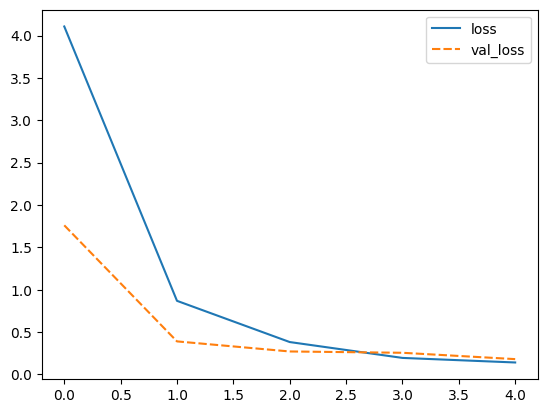

In [ ]:
import pandas as pd
import seaborn as sns
df  = pd.DataFrame(history.history)
sns.lineplot(data = df[['loss','val_loss']])

In [ ]:
#正解率の推移も可視化する

<Axes: >

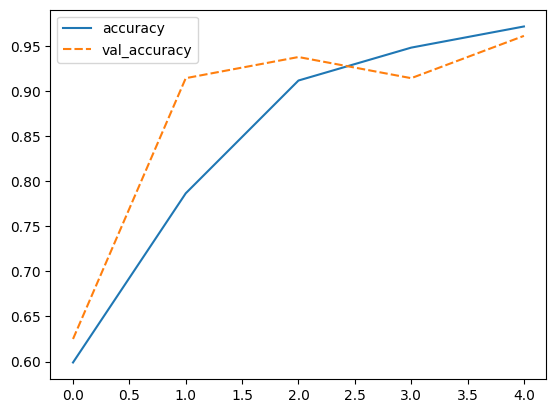

In [ ]:
sns.lineplot(data = df[['accuracy','val_accuracy']])

In [ ]:
# 損失関数と正解率の推移の曲線から、学習データ、バリデーションデータともに良好な数値で安定している。
#十分に学習できていると判断

In [ ]:
#評価
#学習済の予測モデルの評価をする
#Sequentialクラスのevaluateメソッドを使って評価を実行する
#引数にはテストデータのジェネレータを指定する

In [ ]:
model.evaluate(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 0.8594 - loss: 0.3471


[0.32143163681030273, 0.875]

In [ ]:
#accuracy: 0.8438 - loss: 0.3396
#不十分であれば、予測モデルの構造、損失関数、最適化手法、ハイパーパラメータなどを見直して再度学習する

In [ ]:
#予測
#最後に、実際に犬もしくは猫の画像を投入して正しく判定できるか確認する

In [ ]:
#kerasのpreprocessingモジュールのload_img関数をインポートし画像を取り込む
#target_sizeパラメータで、画像サイズを指定する　256,256


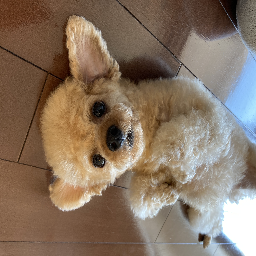

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
unknown_img =load_img('/content/drive/MyDrive/sample_pic/sample_kuu.JPG',target_size=(256,256))
unknown_img

In [ ]:
#画像ファイルの前処理をする
#画像データをarray形式に変換し、予測モデルのインプットデータ構造である　サンプル数×ピクセル×ピクセル×チャネル数にそろえる
#その次に、ImageDataGeneratorのインスタンス作成時の設定と同様に255で割ってスケーリング

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

#array形式に変換
unknown_array = img_to_array(unknown_img)

#データ構造変換
unknown_array = unknown_array.reshape((1,256,256,3))

#スケーリング
unknown_array = unknown_array/255


In [ ]:
#最後にSequentialクラスのpredictメソッドを利用して、取り込んだ画像が犬猫どちらのカテゴリであるかの予測をする

In [ ]:
model.predict(unknown_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


array([[0.79020697, 0.20979302]], dtype=float32)